Plants Based on Water Needs.

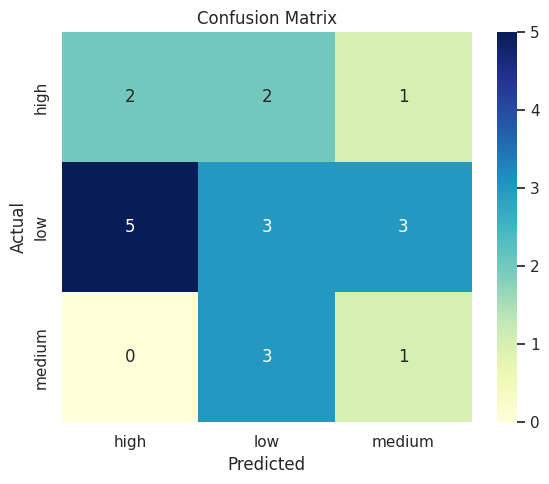


Classification Report:
              precision    recall  f1-score   support

        high       0.29      0.40      0.33         5
         low       0.38      0.27      0.32        11
      medium       0.20      0.25      0.22         4

    accuracy                           0.30        20
   macro avg       0.29      0.31      0.29        20
weighted avg       0.32      0.30      0.30        20



<ipython-input-5-f373ca423c65>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


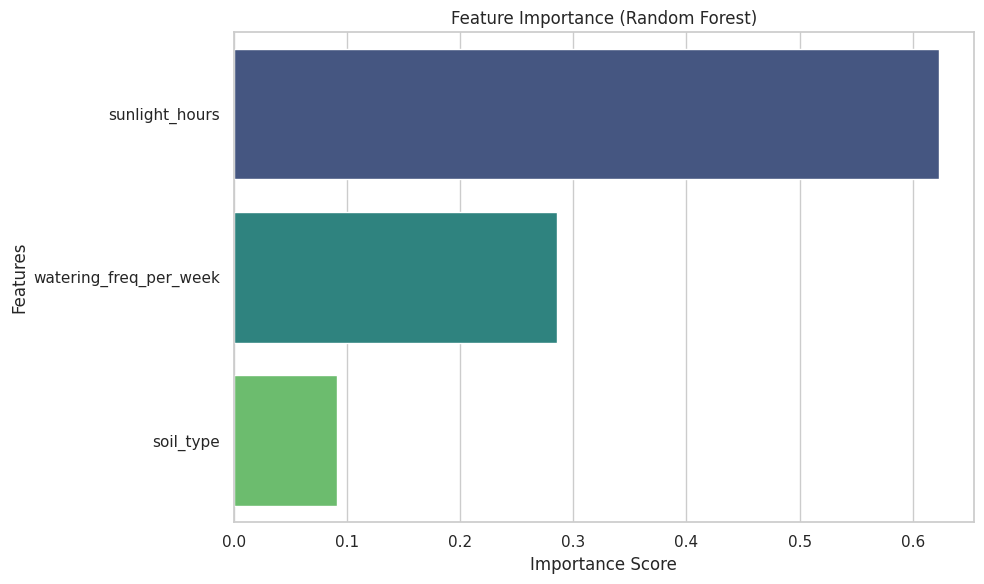

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Enable visual styling
sns.set(style="whitegrid")

# Step 2: Load your dataset
df = pd.read_csv("/content/plants.csv")

# Step 3: Encode categorical features
label_encoders = {}

# Encode 'soil_type'
soil_encoder = LabelEncoder()
df['soil_type'] = soil_encoder.fit_transform(df['soil_type'])

# Encode the target 'water_need'
target_encoder = LabelEncoder()
df['water_need'] = target_encoder.fit_transform(df['water_need'])

# Step 4: Split features and target
X = df.drop('water_need', axis=1)
y = df['water_need']

# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)

# Confusion Matrix - visualized
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report - printed
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Step 9: Feature Importance Plot - visualized
importances = model.feature_importances_
feature_names = X.columns

# Sort by importance
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[sorted_idx],
    y=feature_names[sorted_idx],
    palette="viridis"
)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
